In [40]:
# Importation des librairies nécessaires
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from xgboost import XGBRegressor
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [3]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

In [4]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import RandomizedSearchCV

In [12]:
eucalyptus_stats_data = pd.read_csv("C:\\Users\\yanno\\OneDrive\\Documents\\Data Science 1\\eucalyptus.csv", sep=';')
print(eucalyptus_stats_data)

      numero     ht  circ  bloc   clone
0          1  18.25    36     1  L2-123
1          2  19.75    42     1  L2-123
2          3  16.50    33     1  L2-123
3          4  18.25    39     1  L2-123
4          5  19.50    43     1  L2-123
...      ...    ...   ...   ...     ...
1424    1732  16.50    37     3     2-6
1425    1733  17.00    41     3     2-6
1426    1735  20.25    50     3     2-6
1427    1736  20.25    37     3     2-6
1428    1737  19.75    40     3     2-6

[1429 rows x 5 columns]


In [13]:
eucalyptus_stats_data.head()

,numero,ht,circ,bloc,clone
0,1,18.25,36,1,L2-123
1,2,19.75,42,1,L2-123
2,3,16.50,33,1,L2-123
3,4,18.25,39,1,L2-123
4,5,19.50,43,1,L2-123


In [14]:
eucalyptus_stats_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1429 entries, 0 to 1428
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   numero  1429 non-null   int64  
 1   ht      1429 non-null   float64
 2   circ    1429 non-null   int64  
 3   bloc    1429 non-null   int64  
 4   clone   1429 non-null   object 
dtypes: float64(1), int64(3), object(1)
memory usage: 55.9+ KB


In [15]:
eucalyptus_stats_data[eucalyptus_stats_data['circ'].isna()].head()

,numero,ht,circ,bloc,clone


In [16]:
eucalyptus_stats_data[eucalyptus_stats_data['ht'].isna()].head()

,numero,ht,circ,bloc,clone


In [18]:
eucalyptus_stats_data[eucalyptus_stats_data['circ'].isna()].shape

(0, 5)

In [19]:
eucalyptus_stats_data[eucalyptus_stats_data['ht'].isna()].shape

(0, 5)

In [26]:
# Conversion des colonnes 2-8 to en type float
cols_to_convert = eucalyptus_stats_data.columns[0:4]
eucalyptus_stats_data[cols_to_convert] = eucalyptus_stats_data[cols_to_convert].astype(float)

In [27]:
eucalyptus_stats_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1429 entries, 0 to 1428
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   numero  1429 non-null   float64
 1   ht      1429 non-null   float64
 2   circ    1429 non-null   float64
 3   bloc    1429 non-null   float64
 4   clone   1429 non-null   object 
dtypes: float64(4), object(1)
memory usage: 55.9+ KB


In [28]:
len(eucalyptus_stats_data)

1429

# HELLO BITCH

In [29]:
# Définition d'une fonction permettant d'afficher les nuages de points de la variable réponse en fonction 
# de chacune des variables préditive en fonction de chacune des variables prédictives

def plot_relations(df, num_cols):
    variables = df.columns
    # Cette fonction suppose que la variable réponse est dans la dernière colonne
    dep_var = variables[-1]
    ind_var = variables[:-1]
    figs = len(dep_var)
    num_cols = num_cols
    num_rows = round(figs / num_cols) + 1
    fig = 1
    plt.figure(figsize=(20,30))
    # Boucle sur chacune des variables prédictive pour afficher le nuage de points correspondant
    for i in ind_var:
        pltfignums = [str(num_rows), str(num_cols), str(fig)]
        pltfig = int(''.join(pltfignums))
        plt.subplot(pltfig)
        plt.scatter(df[i], df[dep_var])
        plt.xlabel(str(i))
        plt.ylabel(str(dep_var))
        fig +=1

In [32]:
columns_titles = ["numero","clone","bloc","circ","ht"]
eucalyptus_stats_data = eucalyptus_stats_data.reindex(columns=columns_titles)

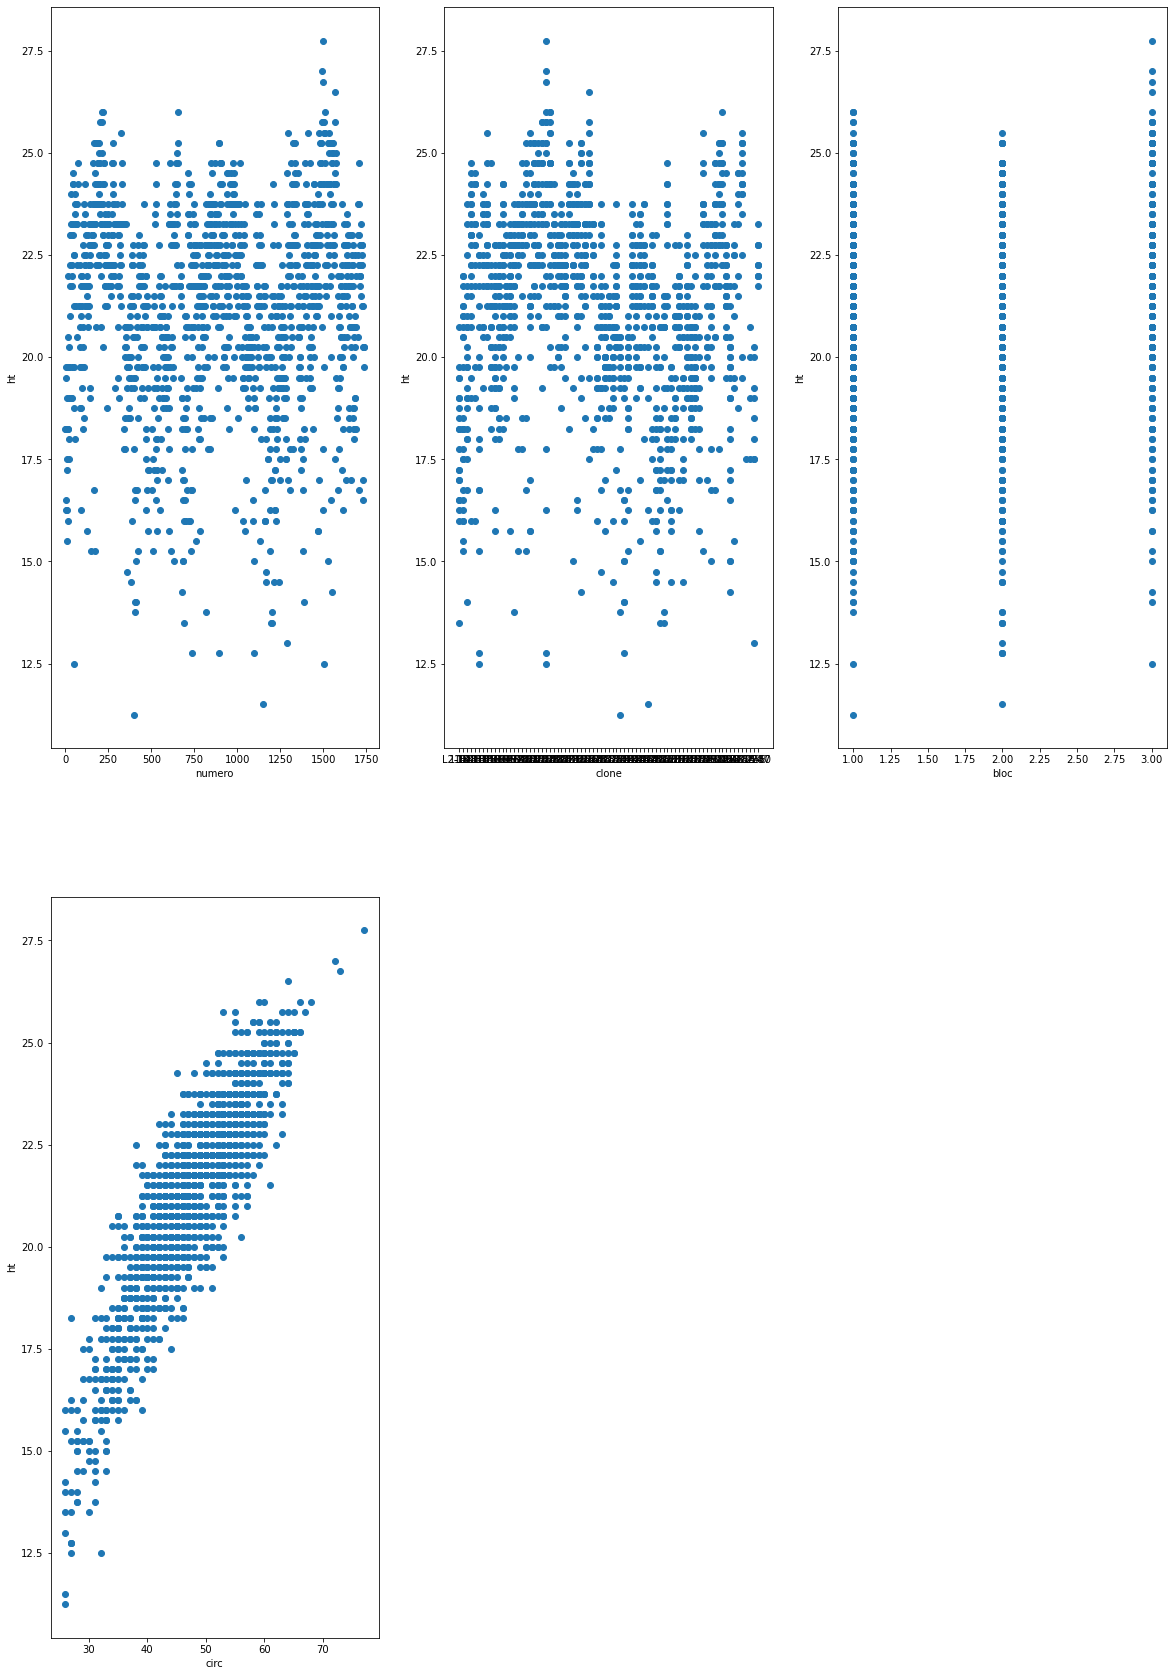

In [33]:
plot_relations(eucalyptus_stats_data, 3)

<AxesSubplot:>

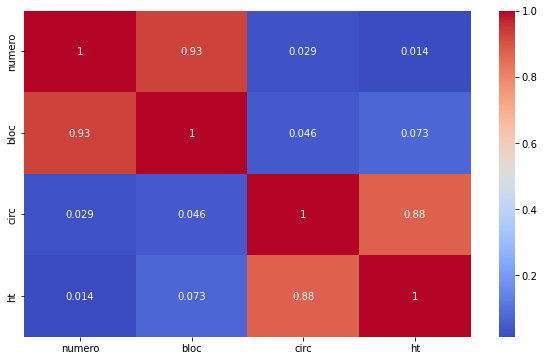

In [35]:
plt.figure(figsize=(10, 6))
sns.heatmap(eucalyptus_stats_data.corr(), annot=True, cmap='coolwarm', fmt='.2g')

In [156]:
eucalyptus_stats_data['Prevision'] = eucalyptus_stats_data['circ'] * b2 + b1
model = sm.OLS(eucalyptus_stats_data['Y'], eucalyptus_stats_data['circ'])
result = model.fit()

In [157]:
print(result.summary())

                                 OLS Regression Results                                
Dep. Variable:                      Y   R-squared (uncentered):                   0.444
Model:                            OLS   Adj. R-squared (uncentered):              0.444
Method:                 Least Squares   F-statistic:                              1140.
Date:                Mon, 23 May 2022   Prob (F-statistic):                   3.45e-184
Time:                        14:46:04   Log-Likelihood:                         -6315.0
No. Observations:                1429   AIC:                                  1.263e+04
Df Residuals:                    1428   BIC:                                  1.264e+04
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

# Explication des résultats

'Dep. Variable' correspond à la variable qui dépend d'autres variables, ici c'est donc Y.

'Model' correspond à la méthode employée, ici OLS signifie 'Ordinary Least Squares', c'est la dénomination anglaise de la méthode des moindres carrés.

'Number of observations' correspond à la taille de notre échantillon de données.

'Df Residuals' correspond à N-K avec N = la taille de l'échantillon de données et K = le nombre de variables définissant Y + 1.

'Df Model' correspond à K-1 avec K = le nombre de variables définissant Y + 1, autrement dit 'Df Model' correspond au nombre de variables définissant Y.



In [ ]:
eucalyptus_stats_data.mean()
b2 = eucalyptus_stats_data.sum(axis = 1, skipna = True)
b1 = 
eucalyptus_stats_data
eucalyptus_stats_data
eucalyptus_stats_data

In [121]:
X = eucalyptus_stats_data['circ']
Y = eucalyptus_stats_data['ht']

In [124]:
X = X.to_numpy()

In [125]:
X

array([36., 42., 33., ..., 50., 37., 40.])

In [130]:
Y = Y.to_numpy()

In [131]:
Y

array([18.25, 19.75, 16.5 , ..., 20.25, 20.25, 19.75])

In [ ]:
mx = mean
my = 

In [147]:
b21 = 0
for i in range (1428):
    b21 = (X[i] - mx)*Y[i]
print(b21)
    
b22 = 0 
for i in range (1428):
    b22 = (X[i] - mx)*(X[i] - mx)
print(b22)

b2 = b21/b22
print(b2)

b1 = my - b2*mx
print(b1)

-209.5428621413576
107.07687504805243
-1.9569385270846011
113.86911178624501


In [134]:
M = eucalyptus_stats_data.mean()

C:\Users\yanno\AppData\Local\Temp\ipykernel_14012\3148353619.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  M = eucalyptus_stats_data.mean()


In [135]:
M

numero    883.216935
bloc        1.852344
circ       47.347796
ht         21.212386
Y          23.973898
dtype: float64

In [138]:
mx = M[2]
my = M[3]

In [139]:
mx

47.34779566130161

In [140]:
my

21.212386284114764

In [154]:
import statsmodels.api as sm
model = sm.OLS(y, x)
result = model.fit()
#Régression avec les moindre carrés ordinaires (OLS)

NameError: name 'y' is not defined